In [1]:
import pandas as pd
import numpy as np

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
%matplotlib inline

In [13]:
df = pd.read_csv('USA_Housing.csv')

In [15]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [30]:
type(df['Price'][0])

numpy.float64

In [29]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [31]:
df['Price']

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [32]:
df.columns


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [33]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [36]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [37]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
from sklearn.model_selection import train_test_split

In [42]:
lm = LinearRegression()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= 143)

In [48]:
lm.fit(X_train, y_train)

LinearRegression()

In [49]:
lm.intercept_

-2626814.019207802

In [51]:
lm.coef_

array([2.15839616e+01, 1.63597087e+05, 1.20365908e+05, 2.30293090e+03,
       1.52214629e+01])

In [62]:
df2 = pd.DataFrame(lm.coef_,X.columns,columns = ['Coeff'])

In [63]:
df2

,Coeff
Avg. Area Income,21.583962
Avg. Area House Age,163597.086503
Avg. Area Number of Rooms,120365.908277
Avg. Area Number of Bedrooms,2302.930895
Area Population,15.221463


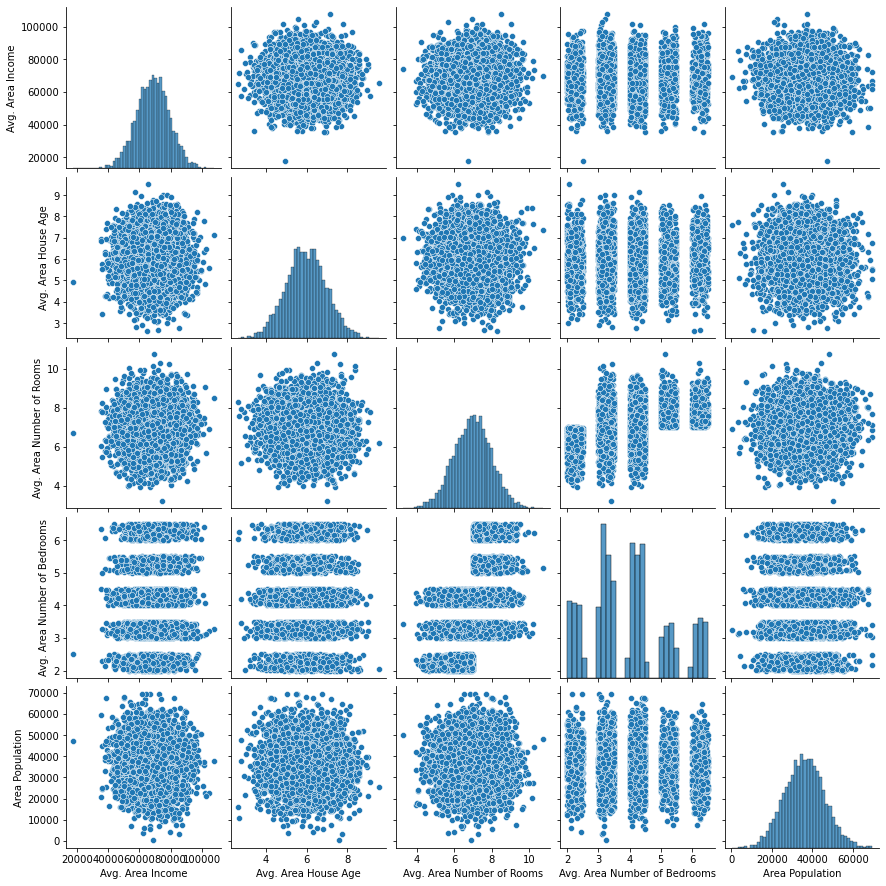

In [65]:
sns.pairplot(X)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

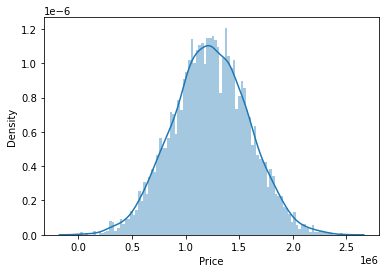

In [69]:
sns.distplot(y, bins = 100)

Predicting model

In [70]:
prediction_value = lm.predict(X_test)

In [71]:
prediction_value

array([1027741.33378516, 1488769.81251255, 1109544.14375065, ...,
        690059.04531369, 1467870.99291659, 1324134.92914225])

In [72]:
y_test

1455    9.719290e+05
1618    1.504664e+06
3749    1.151190e+06
4267    9.501216e+05
3498    1.432013e+06
            ...     
4776    1.151407e+06
919     1.452154e+06
3005    6.509392e+05
3331    1.470427e+06
2257    1.168994e+06
Name: Price, Length: 2000, dtype: float64

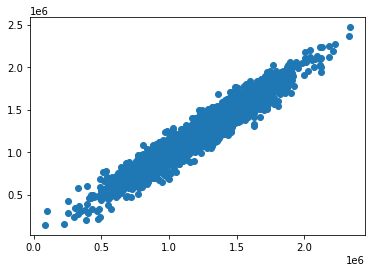

In [73]:
plt.scatter(prediction_value, y_test)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

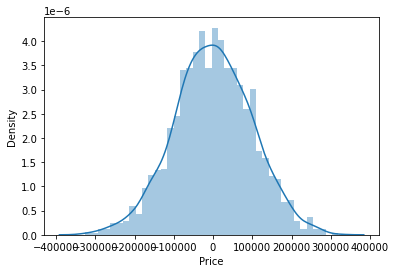

In [75]:
sns.distplot((y_test-prediction_value), bins = 40)

# Regression Metrics

In [77]:
from sklearn import metrics

In [83]:
metrics.mean_absolute_error(prediction_value,y_test)

79097.25088882279

In [80]:
metrics.mean_squared_error(y_test, prediction_value)

9875962111.104948

In [81]:
np.sqrt(metrics.mean_squared_error(y_test,prediction_value))

99377.87536018743

In [82]:
np.sqrt(metrics.mean_squared_error(prediction_value,y_test))

99377.87536018743

# BOSTON DATA

In [84]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)
boston_df = boston.data

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [94]:
bst = pd.DataFrame(boston_df, columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','PTRATIO','B','LSTAT', 'MEDV'])

In [95]:
bst.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


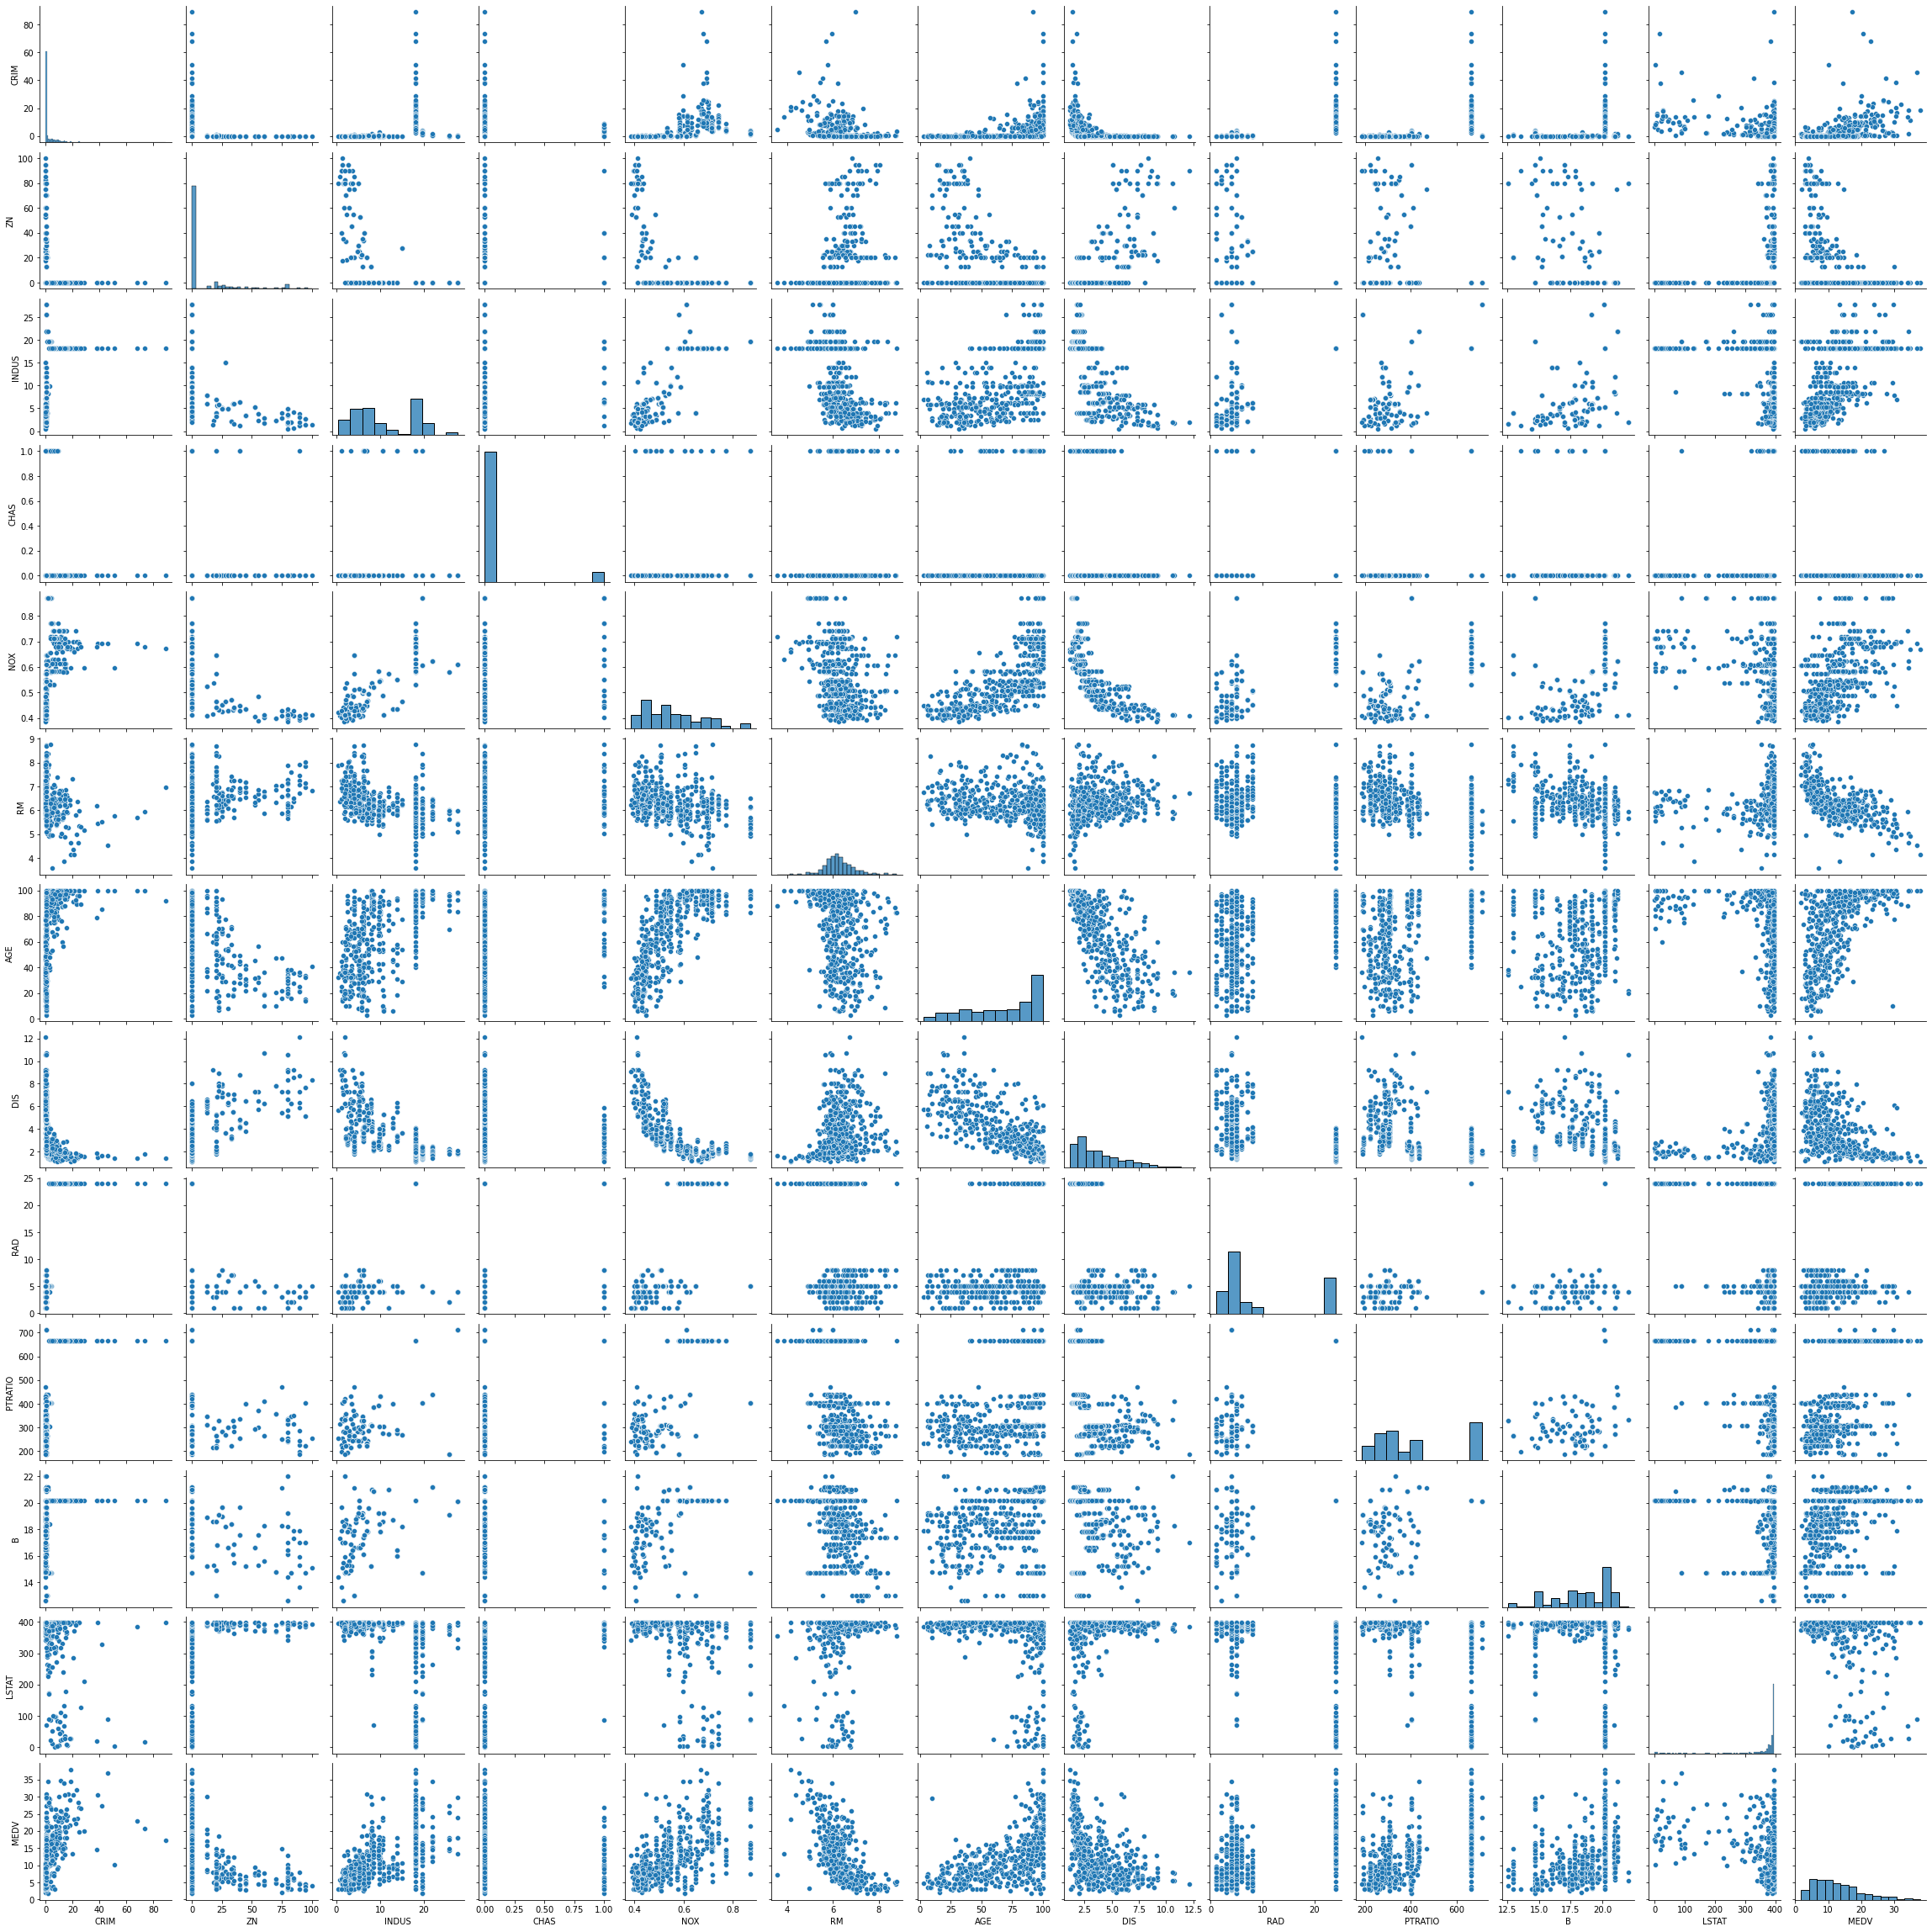

In [96]:
sns.pairplot(bst)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

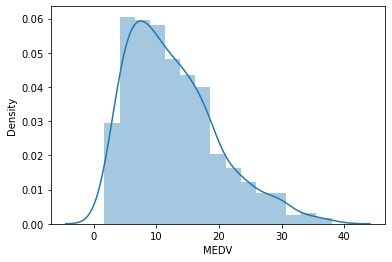

In [97]:
sns.distplot(bst['MEDV'])

# USING SCIKIT LEARN AND SPLITTING THE DATA

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
bst.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [108]:
X = bst[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'PTRATIO', 'B', 'LSTAT']]

y = bst['MEDV']

In [109]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90


In [110]:
y.head()

0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: MEDV, dtype: float64

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state = 143)

In [112]:
lm = LinearRegression()

In [113]:
lm.fit(X_train, y_train)

LinearRegression()

In [114]:
lm.intercept_

37.681828007765176

In [115]:
lm.coef_

array([ 9.35278929e-02,  2.19092508e-02,  1.06436854e-01, -8.31905451e-01,
        1.17998961e+00, -5.10949693e+00,  7.91743658e-02, -5.03159930e-02,
        1.67445879e-01, -3.44600654e-03,  1.69502229e-01, -1.01358083e-02])

In [121]:
bst2 = pd.DataFrame(lm.coef_, X.columns, columns = ['COEFFICIENT'])

In [122]:
bst2

,COEFFICIENT
CRIM,0.093528
ZN,0.021909
INDUS,0.106437
CHAS,-0.831905
NOX,1.179990
RM,-5.109497
AGE,0.079174
DIS,-0.050316
RAD,0.167446
PTRATIO,-0.003446


# Predicting the data

In [123]:
from sklearn import metrics

In [126]:
predic = lm.predict(X_test)

In [125]:
y_test

354     8.05
407    12.13
436    18.05
487    11.45
452    17.27
       ...  
72      5.52
142    26.82
337    10.56
295     6.27
31     13.04
Name: MEDV, Length: 203, dtype: float64

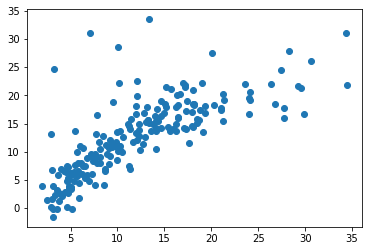

In [127]:
plt.scatter(y_test,predic)

In [128]:
metrics.mean_absolute_error(y_test, predic)

3.1841728391682373

In [129]:
metrics.mean_squared_error(y_test, predic)

22.888980238064526

In [130]:
np.sqrt(metrics.mean_squared_error(y_test, predic))

4.78424291169089

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

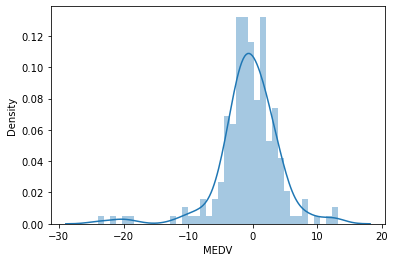

In [137]:
sns.distplot((y_test - predic), bins =40)